In [38]:
import pandas as pd
import joblib

clf = joblib.load("rf_area_classifier_full.pkl")

new_data = pd.read_csv("../2_Feature_Extraction/extract_features/tracking_features.csv")  
X_new = new_data.drop(columns=["tracking_id", "num_stops", "total_distance"])

new_data["predicted_label"] = clf.predict(X_new)
new_data.to_csv("new_tracking_predictions.csv", index=False)



<Axes: title={'center': 'Predicted Label Distribution'}, xlabel='predicted_label'>

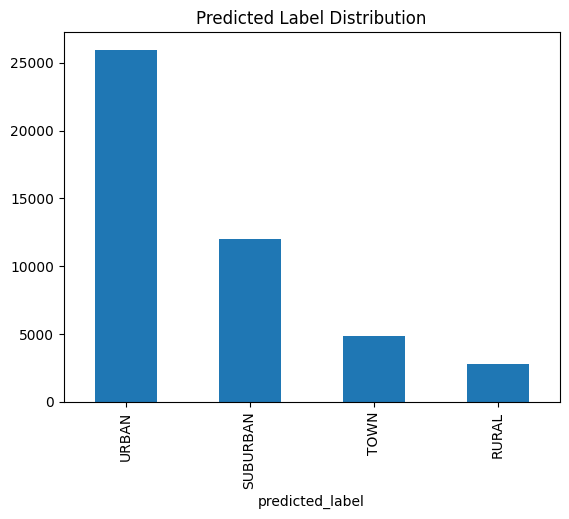

In [39]:
new_data["predicted_label"].value_counts().plot(kind="bar", title="Predicted Label Distribution")


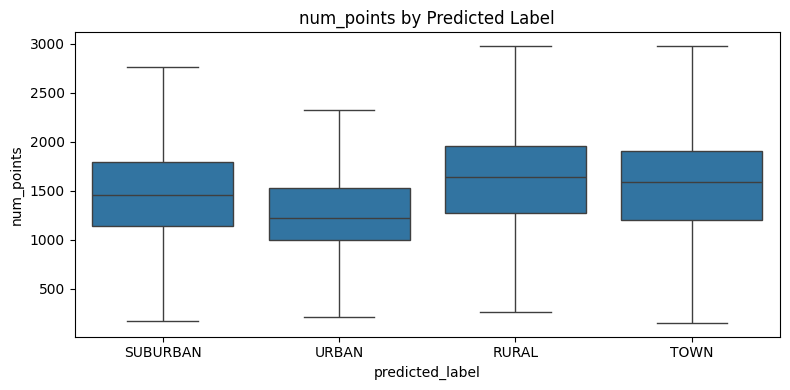

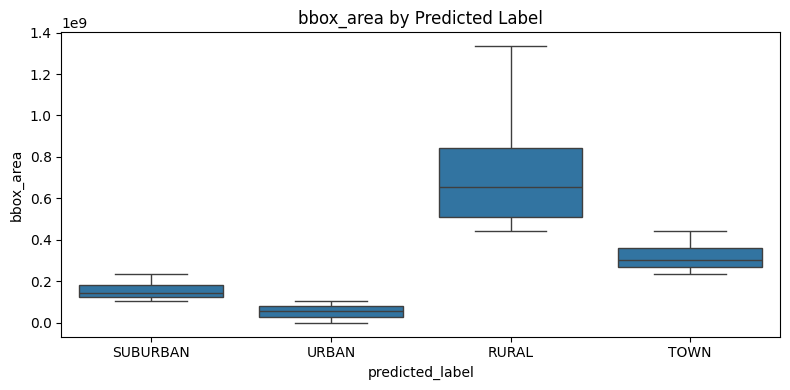

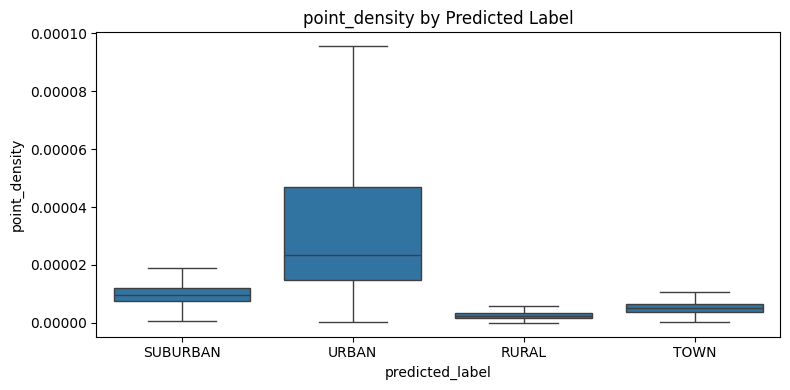

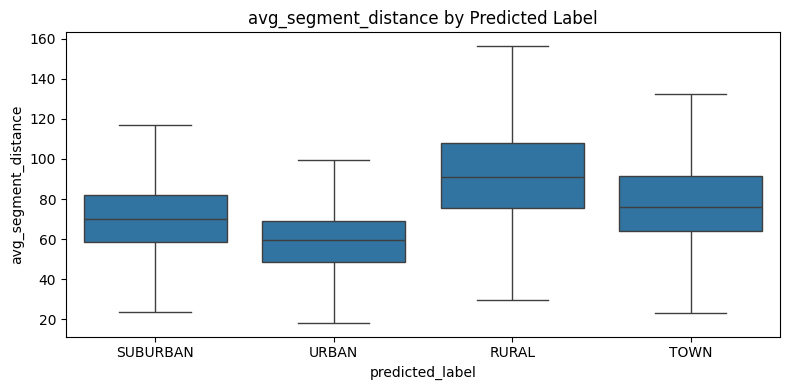

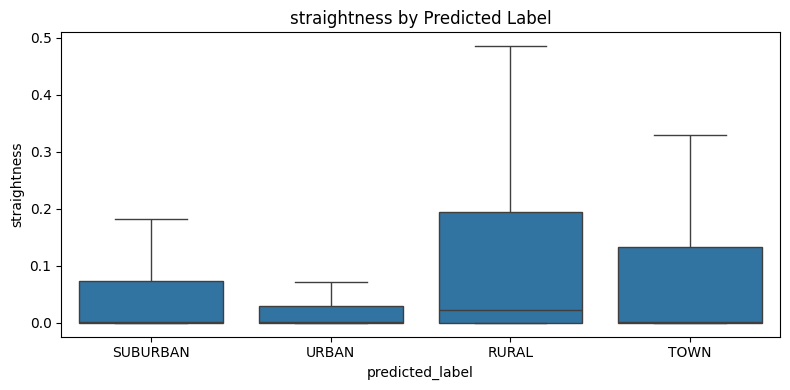

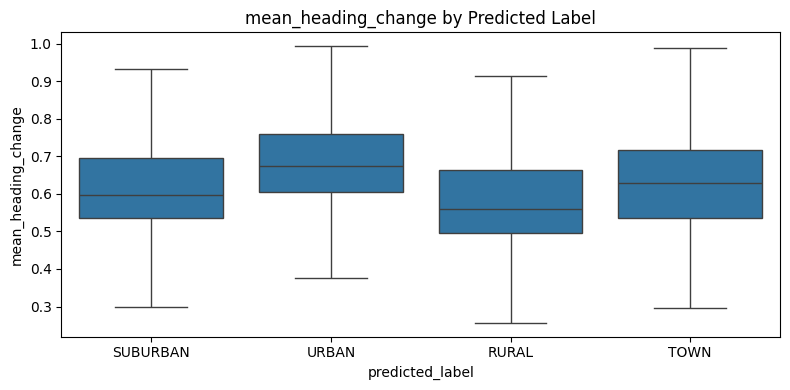

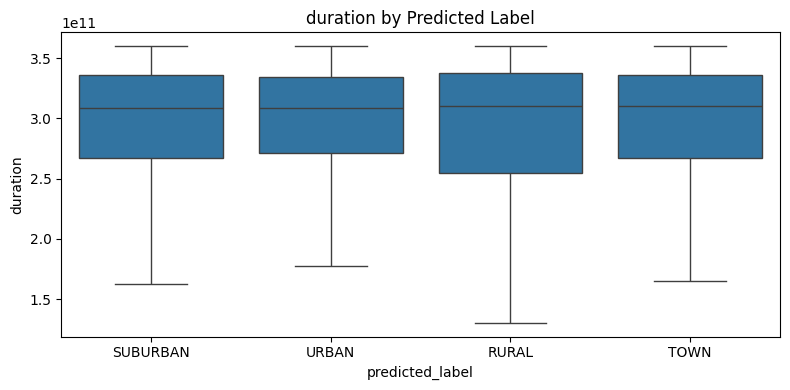

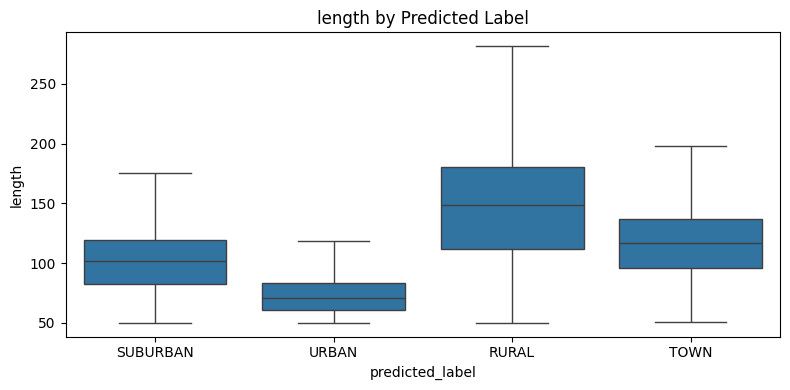

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ["num_points", "bbox_area", "point_density", "avg_segment_distance",
    "straightness", "mean_heading_change", "duration", "length"]

for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=new_data, x="predicted_label", y=feature, showfliers=False)
    plt.title(f"{feature} by Predicted Label")
    plt.tight_layout()
    plt.show()


In [41]:
df = pd.read_csv("new_tracking_predictions.csv")

for label in df["predicted_label"].unique():
    print(f"\n=== {label} ===")
    display(df[df["predicted_label"] == label].sample(3, random_state=42))



=== SUBURBAN ===


tracking_id  num_points     bbox_area  point_density  \
39530        84979        1379  1.304977e+08       0.000011   
26507        56016         727  1.152128e+08       0.000006   
11899        26851        1366  1.215152e+08       0.000011   

       avg_segment_distance  total_distance  straightness  \
39530             82.918170   114261.237586      0.060507   
26507             87.832500    63766.395330      0.059285   
11899             75.915085   103624.090452      0.000187   

       mean_heading_change  num_stops      duration      length  \
39530             0.487409       1379  319270000000  115.050596   
26507             0.802956        727  179610000000   65.033465   
11899             0.585247       1366  276510000000  104.542450   

      predicted_label  
39530        SUBURBAN  
26507        SUBURBAN  
11899        SUBURBAN


=== URBAN ===


tracking_id  num_points     bbox_area  point_density  \
32271        69634        1108  1.697817e+07       0.000065   
25443        53265        1215  9.733941e+07       0.000012   
26540        56089         710  9.214048e+07       0.000008   

       avg_segment_distance  total_distance  straightness  \
32271             61.196757    67744.809961      0.003004   
25443             75.454424    91601.670897      0.000779   
26540             78.687844    55789.681119      0.000927   

       mean_heading_change  num_stops      duration     length predicted_label  
32271             0.713769       1108  298740000000  69.232740           URBAN  
25443             0.622650       1215  326760000000  92.784952           URBAN  
26540             0.579978        710  197110000000  56.516914           URBAN


=== RURAL ===


tracking_id  num_points     bbox_area  point_density  \
8613         20626         671  4.627785e+08   1.449938e-06   
15187        32777         462  5.217682e+08   8.854506e-07   
2837          8790        1981  2.177805e+09   9.096314e-07   

       avg_segment_distance  total_distance  straightness  \
8613              95.157482    63755.513057      0.384660   
15187            141.801604    65370.539418      0.470051   
2837             146.973473   291007.476031      0.000002   

       mean_heading_change  num_stops      duration      length  \
8613              0.592765        671  286220000000   64.662094   
15187             0.519943        462  138120000000   65.784669   
2837              0.476999       1981  352730000000  292.163922   

      predicted_label  
8613            RURAL  
15187           RURAL  
2837            RURAL


=== TOWN ===


tracking_id  num_points     bbox_area  point_density  \
9520         22898        1037  2.969422e+08       0.000003   
39226        84425        1365  2.385411e+08       0.000006   
15085        32542         735  2.794893e+08       0.000003   

       avg_segment_distance  total_distance  straightness  \
9520              85.674999    88759.298890      0.001152   
39226             80.634009   109984.788380      0.034332   
15085            125.191751    91890.745031      0.007251   

       mean_heading_change  num_stops      duration      length  \
9520              0.624428       1037  335220000000   89.063436   
39226             0.591229       1365  289830000000  110.656704   
15085             0.505782        735  158760000000   92.608018   

      predicted_label  
9520             TOWN  
39226            TOWN  
15085            TOWN

In [42]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import contextily as ctx
# import geopandas as gpd
# from shapely.geometry import LineString

# predicted_df = pd.read_csv("new_tracking_predictions.csv")
# waypoints_df = pd.read_parquet("../2_Feature_Extraction/data/filtered_waypoints.parquet")

# sampled_ids = (
#     predicted_df.groupby("predicted_label")
#     .apply(lambda x: x.sample(n=2, random_state=42))["tracking_id"]
#     .explode()
#     .tolist()
# )

# sampled_routes = waypoints_df[waypoints_df["id_tracking"].isin(sampled_ids)]

# fig, axes = plt.subplots(2, 4, figsize=(20, 10))
# axes = axes.flatten()

# color_map = {
#     "RURAL": "red",
#     "SUBURBAN": "orange",
#     "TOWN": "blue",
#     "URBAN": "green"
# }

# for i, tracking_id in enumerate(sampled_ids):
#     ax = axes[i]
#     route = sampled_routes[sampled_routes["id_tracking"] == tracking_id].sort_values("sequence")
#     coords = list(zip(route["longitude"], route["latitude"]))
#     label = predicted_df[predicted_df["tracking_id"] == tracking_id]["predicted_label"].values[0]

#     if len(coords) < 2:
#         continue

#     line = LineString(coords)
#     gdf = gpd.GeoDataFrame(index=[0], geometry=[line], crs="EPSG:4326").to_crs(epsg=3857)

#     gdf.plot(ax=ax, color=color_map.get(label, "gray"), linewidth=2)
#     ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

#     ax.set_title(f"{label} - ID {tracking_id}", fontsize=9)
#     ax.set_axis_off()

# for j in range(len(sampled_ids), len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# # plt.savefig("Figures/predicted_tracking_routes_mapgrid.png", dpi=300)
# plt.show()


/tmp/ipykernel_12201/1810225943.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=trackings_per_group, random_state=42))["tracking_id"]


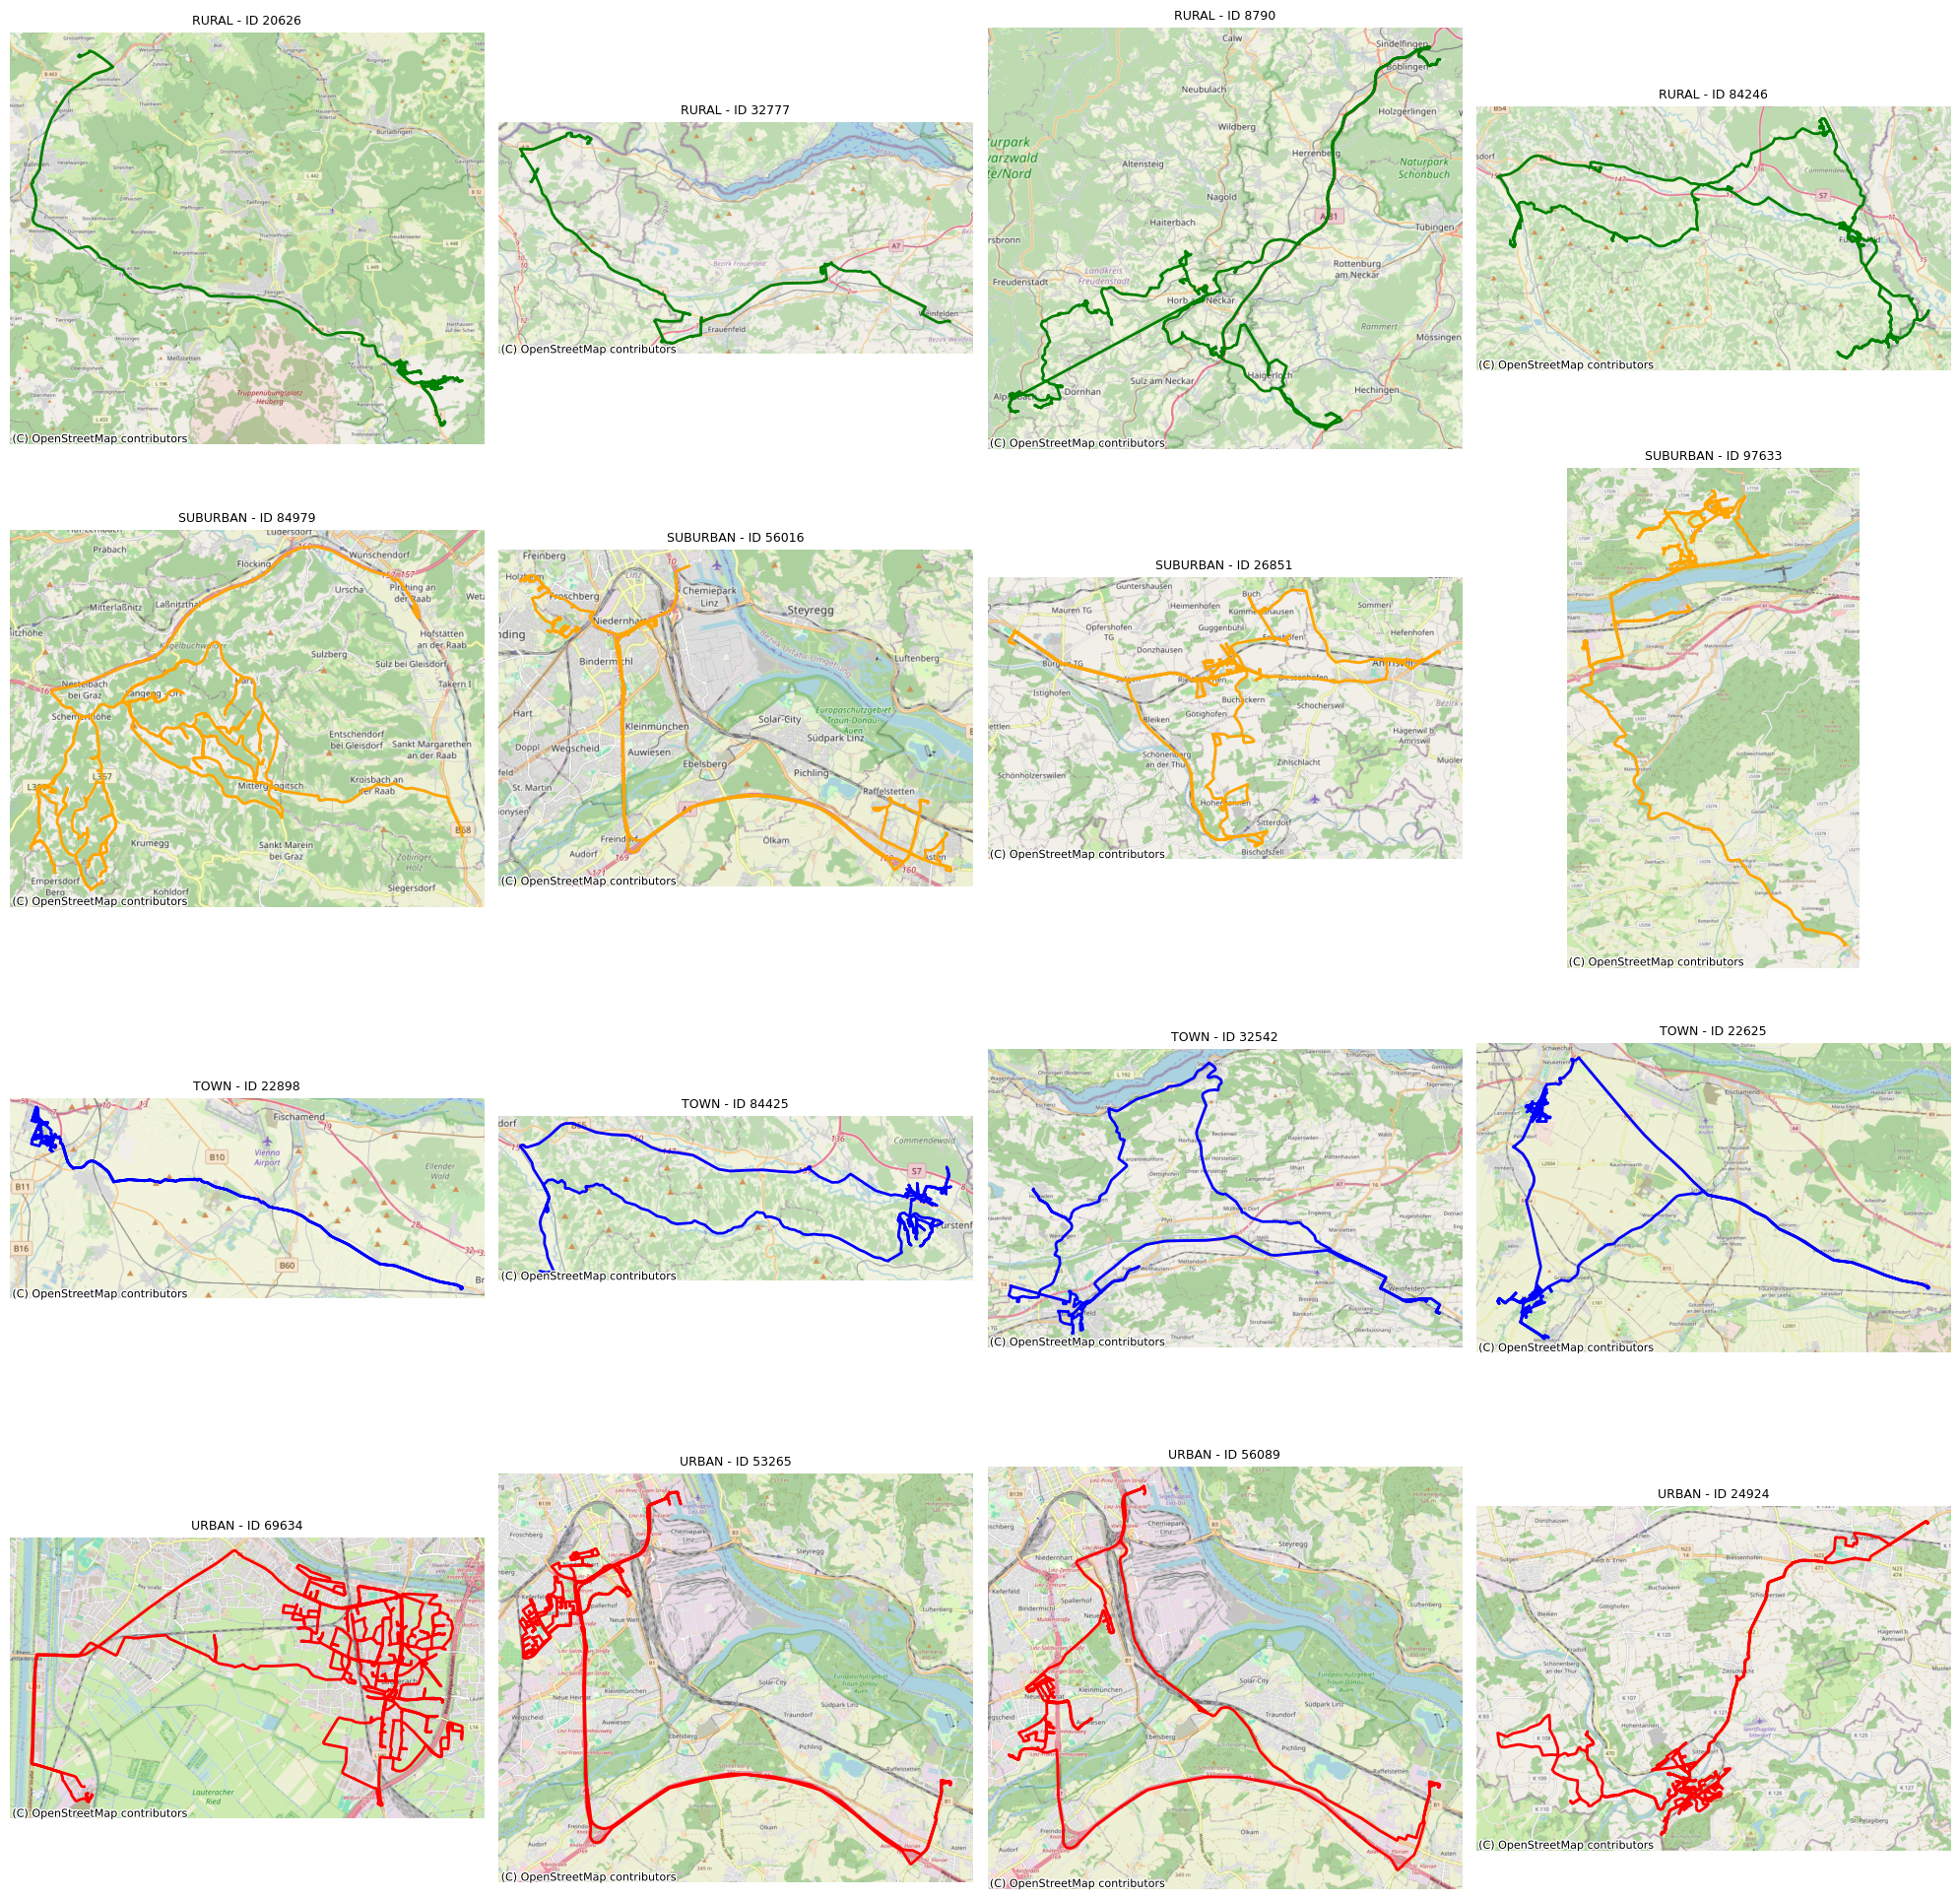

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import LineString
import pyarrow.parquet as pq

# Load predictions (small file)
predicted_df = pd.read_csv("new_tracking_predictions.csv")

trackings_per_group = 4

# Sample 2 IDs per predicted label
sampled_ids = (
    predicted_df.groupby("predicted_label")
    .apply(lambda x: x.sample(n=trackings_per_group, random_state=42))["tracking_id"]
    .explode()
    .tolist()
)

# Efficiently load only the required trackings from large Parquet file
table = pq.read_table(
    "../Data_Preperation/filtered_data_full_1.parquet",
    filters=[("id_tracking", "in", sampled_ids)]
)
sampled_routes = table.to_pandas()

# Plotting
fig, axes = plt.subplots(trackings_per_group, 4, figsize=(20, 20))
axes = axes.flatten()

color_map = {
    "URBAN": "red",
    "SUBURBAN": "orange",
    "TOWN": "blue",
    "RURAL": "green",
}

for i, tracking_id in enumerate(sampled_ids):
    ax = axes[i]
    route = sampled_routes[sampled_routes["id_tracking"] == tracking_id].sort_values("sequence")
    coords = list(zip(route["longitude"], route["latitude"]))
    label = predicted_df[predicted_df["tracking_id"] == tracking_id]["predicted_label"].values[0]

    if len(coords) < 2:
        continue

    line = LineString(coords)
    gdf = gpd.GeoDataFrame(index=[0], geometry=[line], crs="EPSG:4326").to_crs(epsg=3857)

    gdf.plot(ax=ax, color=color_map.get(label, "gray"), linewidth=2)
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

    ax.set_title(f"{label} - ID {tracking_id}", fontsize=9)
    ax.set_axis_off()

# Hide any unused subplots
for j in range(len(sampled_ids), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

